In [1]:
import pandas as pd
import re
from pyvi import ViTokenizer
from collections import Counter

file_path = "data.txt"  # Đường dẫn tới file của bạn

# Đọc file và tách các đoạn văn
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Tách các đoạn văn dựa trên ký tự xuống dòng
all_content = content.split('\n')

# Loại bỏ các đoạn trống hoặc chỉ chứa khoảng trắng
all_content = [para.strip() for para in all_content if para.strip()]

# In số lượng đoạn văn và nội dung của một số đoạn
print(f"Số đoạn văn: {len(all_content)}")
print("Đoạn đầu tiên:", all_content[0])
if len(all_content) > 1:
    print("Đoạn thứ hai:", all_content[1])

Số đoạn văn: 2240
Đoạn đầu tiên: Bên trong xe là tiếng nhạc ầm ĩ, mùi rượu cay nồng và 4-5 người đàn ông sẵn sàng thách thức bất kỳ ai dám đối đầu Nạn nhân may mắn không bị thương, những người trên xe sau đó bỏ đi với vẻ bất cần, còn anh Thanh ở lại hỏi han người bị nạn và cho số điện thoại để sẵn sàng ra làm chứng khi cần.
Đoạn thứ hai: Hoàng Thanh chia sẻ, việc anh làm bị nhiều người cho là liều lĩnh, nhưng bản thân anh lúc đó cũng không đủ thời gian để suy nghĩ, cân nhắc nhiều mà chỉ nghĩ rằng cần phải làm gì đó giúp đỡ người bị nạn và yêu cầu người gây ra lỗi có trách nhiệm với hành vi của mình.


In [2]:
# stop words
stop_words = set([
    "tôi", "bạn", "mình", "chúng", "họ", "ấy", "này", "đó", "kia", "nào", "mỗi", "tất cả", "vài", "một",
    "cái", "các", "những", "của", "với", "từ", "bởi", "và", "nhưng", "hoặc", "vì vậy", "tuy nhiên", "mặc dù",
    "nên", "khi", "là", "không", "có", "đã", "đang", "sẽ", "thì", "hôm nay", "ngày mai", "hôm qua", "bây giờ",
    "lâu", "gần đây", "nơi", "đâu", "đây", "đó", "kia", "rất", "khá", "ít", "nhiều", "tất", "hoàn toàn",
    "một chút", "lên", "xuống", "ra", "vào", "đi", "đến", "gì", "sao", "thế nào", "bao nhiêu", "bao lâu",
    "với", "mà", "cũng", "như", "của", "vì", "nếu", "sau", "trước", "để", "khi nào", "trong", "lại", "bạn",
    "có thể", "chỉ", "có", "mới", "thêm", "nhất", "cũng", "vẫn", "nữa", "còn", "một", "lại", "cùng", "bắt đầu",
    "để", "sẽ", "theo", "với", "có thể", "sẽ", "vừa", "có lẽ", "vậy", "mới", "như vậy", "hầu hết", "thậm chí",
    "điều này", "thực tế", "nếu như", "vậy là", "thực sự", "hoàn toàn", "chẳng hạn", "một lần nữa", "và cả"
])

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Loại bỏ ký tự đặc biệt, số, dấu câu
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    text = re.sub(r'\d+', '', text)      # Xóa số
    text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    text = text.lower()# Chuyển chữ thường
    text = ViTokenizer.tokenize(text)# Tách từ bằng pyvi
    # Loại bỏ stopwords
    words = text.split()  # Tách từ đã được tokenize
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

In [3]:
# Áp dụng tiền xử lý cho tất cả dữ liệu
all_content = [preprocess_text(text) for text in all_content]

# Loại bỏ các hàng rỗng sau khi xử lý
all_content = [text for text in all_content if text != ""]

# Xuất dữ liệu đã tiền xử lý
print("Số lượng đoạn văn sau tiền xử lý:", len(all_content))
print("Một số dữ liệu sau tiền xử lý:", all_content[:5])
print("Tiền xử lý hoàn tất.")

Số lượng đoạn văn sau tiền xử lý: 2240
Một số dữ liệu sau tiền xử lý: ['bên xe tiếng nhạc ầm_ĩ mùi rượu cay nồng người đàn_ông sẵn_sàng thách_thức bất_kỳ ai dám đối_đầu nạn_nhân may_mắn bị_thương người trên xe bỏ vẻ bất_cần anh thanh ở hỏi_han người bị nạn cho số điện_thoại sẵn_sàng làm_chứng cần', 'hoàng thanh chia_sẻ việc anh làm bị người cho liều_lĩnh bản_thân anh lúc đủ thời_gian suy_nghĩ cân_nhắc nghĩ rằng cần phải làm giúp_đỡ người bị nạn yêu_cầu người gây lỗi trách_nhiệm hành_vi', 'anh nguyễn hoàng thanh trái bắt_tay phóng_viên báo an_ninh thủ_đô chàng sinh_viên làm_việc thiện ngại gặp quần_áo bẩn đầu tháng_một vụ tai_nạn giao_thông nghiêm_trọng xảy khiến nạn_nhân người đàn_ông trung_niên nhập_viện cần phải phẫu_thuật', 'nghĩ cuộc_sống khó tránh khỏi nốt trầm màu buồn u_tối khoảnh_khắc giận_dữ bức_xúc bỏ_qua mọi thứ tiêu_cực con_người tràn_đầy sức_sống sẵn_sàng lan_tỏa năng_lượng tích_cực thông_qua nụ cười ánh mắt hành_động ý_nghĩa', 'thấy bị mụn quan_tâm dập lửa số tìm_kiếm loạ

In [6]:
# Tạo từ điển (vocabulary)
all_words = ' '.join(all_content).split()
word_counts = Counter(all_words)

# Tạo từ điển: Chỉ giữ những từ có tần suất xuất hiện lớn hơn một ngưỡng nhất định
vocabulary = {
    word: idx
    for idx, (word, count) in enumerate(word_counts.items()) }

print(f"Từ điển chứa {len(vocabulary)} từ")
print(f"10 từ phổ biến nhất {word_counts.most_common(10)}")

Từ điển chứa 9275 từ
10 từ phổ biến nhất [('người', 1180), ('cho', 1168), ('được', 963), ('ở', 537), ('về', 533), ('làm', 461), ('phải', 456), ('có_thể', 449), ('bị', 437), ('anh', 411)]


In [7]:
# Lưu từ điển vào file
with open('vocabulary.txt', 'w', encoding='utf-8') as f:
    for word, idx in vocabulary.items():
        f.write(f"{word} {idx} {word_counts[word]}\n")

print("Lưu từ điển hoàn tất.")

Lưu từ điển hoàn tất.


In [15]:
# Tạo dữ liệu Skip-Gram
def generate_skip_gram_pairs(sentence, window_size=3):
    words = sentence.split()
    pairs = []
    for center_idx in range(len(words)):
        center_word = words[center_idx]
        start_idx = max(center_idx - window_size, 0)
        end_idx = min(center_idx + window_size + 1, len(words))
        for context_idx in range(start_idx, end_idx):
            if context_idx != center_idx:
                pairs.append((center_word, words[context_idx]))
    return pairs

skip_gram_data = []
for sentence in all_content:
    skip_gram_data.extend(generate_skip_gram_pairs(sentence))

print(f"Số lượng cặp Skip-Gram: {len(skip_gram_data)}")

Số lượng cặp Skip-Gram: 477078


In [17]:
# Chuyển đổi skip-gram thành chỉ số
indexed_skip_grams = []
for center, context in skip_gram_data:
    if center in vocabulary and context in vocabulary:
        indexed_skip_grams.append((vocabulary[center], vocabulary[context]))

print(f"Số lượng Skip-Gram sau khi chuyển đổi thành chỉ số: {len(indexed_skip_grams)}")

# Lưu Skip-Gram thành chỉ số vào file
with open('skip_gram_pairs.txt', 'w', encoding='utf-8') as f:
    for center_idx, context_idx in indexed_skip_grams:
        f.write(f"{center_idx} {context_idx}\n")

print("Lưu dữ liệu Skip-Gram hoàn tất.")

Số lượng Skip-Gram sau khi chuyển đổi thành chỉ số: 477078
Lưu dữ liệu Skip-Gram hoàn tất.


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file skip-gram pairs
def read_skip_gram_pairs(file_path):
    pairs = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            center_idx, context_idx = map(int, line.strip().split())
            pairs.append((center_idx, context_idx))
    return pairs

# Đọc từ điển (vocabulary)
def read_vocabulary(file_path):
    word_to_idx = {}
    idx_to_word = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            word, idx, _ = line.strip().split()
            word_to_idx[word] = int(idx)
            idx_to_word[int(idx)] = word
    return word_to_idx, idx_to_word

# Đọc dữ liệu
skip_gram_pairs = read_skip_gram_pairs('skip_gram_pairs.txt')
word_to_idx, idx_to_word = read_vocabulary('vocabulary.txt')

vocab_size = len(word_to_idx)
embedding_dim = 100  # Kích thước của vector nhúng

In [ ]:
# Hàm softmax cho batch
def softmax_batch(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Tránh tràn số
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Hàm cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Để tránh log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))  # Cross-entropy

In [ ]:
def train_skipgram_model(skip_gram_pairs, W_in, W_out, vocab_size, embedding_dim, epochs=10, batch_size=64, learning_rate=0.01):
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        random.shuffle(skip_gram_pairs)

        # Huấn luyện với batch_size
        for i in range(0, len(skip_gram_pairs), batch_size):
            batch = skip_gram_pairs[i:i+batch_size]
            loss = 0
            grad_W_in = np.zeros_like(W_in)
            grad_W_out = np.zeros_like(W_out)

            # Vector hóa tính toán cho toàn bộ batch
            center_idx_batch = [center_idx for center_idx, _ in batch]
            context_idx_batch = [context_idx for _, context_idx in batch]

            center_vec_batch = W_in[center_idx_batch]  # Ma trận nhúng của center
            context_vec_batch = W_out[:, context_idx_batch]  # Ma trận của context

            # Tính toán xác suất softmax cho tất cả các cặp center-context trong batch
            predictions_batch = softmax_batch(np.dot(center_vec_batch, W_out))  # Áp dụng softmax trên toàn bộ batch

            # Cập nhật mất mát
            for idx, (center_idx, context_idx) in enumerate(batch):
                target = np.zeros(vocab_size)
                target[context_idx] = 1
                loss += cross_entropy_loss(target, predictions_batch[idx])

                # Tính gradient
                error = predictions_batch[idx] - target
                grad_W_in[center_idx] += np.dot(error, W_out.T)
                # Fix: Sum the gradient over the vocabulary dimension before updating grad_W_out
                grad_W_out[:, context_idx] += np.sum(center_vec_batch[idx] * error[:, np.newaxis], axis=0)  # Cập nhật cho từng context

            # Cập nhật trọng số
            W_in -= learning_rate * grad_W_in
            W_out -= learning_rate * grad_W_out
            total_loss += loss

        losses.append(total_loss / len(skip_gram_pairs))
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(skip_gram_pairs)}")

    return W_in, W_out, losses

Epoch 1/10, Loss: 9.122459724370344
Epoch 2/10, Loss: 9.091591336000509
Epoch 3/10, Loss: 9.065874993354086
Epoch 4/10, Loss: 9.043495221531531
Epoch 5/10, Loss: 9.02356882315475
Epoch 6/10, Loss: 9.00562885754012
Epoch 7/10, Loss: 8.989316880185468
Epoch 8/10, Loss: 8.974323331357654
Epoch 9/10, Loss: 8.960404832173785
Epoch 10/10, Loss: 8.947380553439709


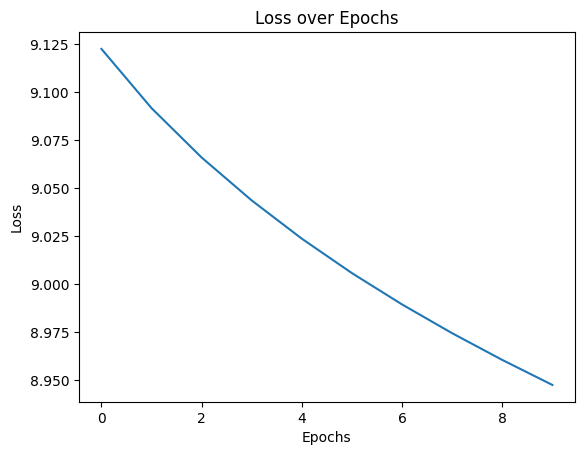

In [ ]:
# Khởi tạo ma trận nhúng và trọng số đầu ra
W_in = np.random.randn(vocab_size, embedding_dim) / np.sqrt(vocab_size)
W_out = np.random.randn(embedding_dim, vocab_size) / np.sqrt(embedding_dim)

# Huấn luyện mô hình
W_in, W_out, losses = train_skipgram_model(skip_gram_pairs, W_in, W_out, vocab_size, embedding_dim, epochs=10, batch_size=15000, learning_rate=0.01)

# Vẽ biểu đồ mất mát
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [ ]:
import pickle

# Lưu mô hình vào file
def save_model(W_in, W_out, word_to_idx, idx_to_word, file_path='skip_gram_model.pkl'):
    model = {
        'W_in': W_in,
        'W_out': W_out,
        'word_to_idx': word_to_idx,
        'idx_to_word': idx_to_word
    }
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Mô hình đã được lưu vào {file_path}")

# Gọi hàm lưu mô hình
save_model(W_in, W_out, word_to_idx, idx_to_word, file_path='skip_gram_model.pkl')


Mô hình đã được lưu vào skip_gram_model.pkl


In [ ]:
# Tải mô hình từ file
def load_model(file_path='skip_gram_model.pkl'):
    with open(file_path, 'rb') as f:
        model = pickle.load(f)
    print(f"Mô hình đã được tải từ {file_path}")
    return model['W_in'], model['W_out'], model['word_to_idx'], model['idx_to_word']

# Gọi hàm tải mô hình
W_in_loaded, W_out_loaded, word_to_idx_loaded, idx_to_word_loaded = load_model('skip_gram_model.pkl')


Mô hình đã được tải từ skip_gram_model.pkl


In [ ]:
print("Kích thước W_in:", W_in_loaded.shape)
print("Kích thước W_out:", W_out_loaded.shape)

Kích thước W_in: (9275, 100)
Kích thước W_out: (100, 9275)


In [ ]:
# Hàm tính cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Hàm đánh giá các cặp từ
def evaluate_embeddings(word_pairs, W_in, word_to_idx):
    results = []
    for word1, word2 in word_pairs:
        if word1 in word_to_idx and word2 in word_to_idx:
            vec1 = W_in[word_to_idx[word1]]
            vec2 = W_in[word_to_idx[word2]]
            similarity = cosine_similarity(vec1, vec2)
            results.append((word1, word2, similarity))
        else:
            results.append((word1, word2, None))
    return results


In [ ]:
word_pairs = [
    ("trái_cây", "hoa_quả"),  # Đồng nghĩa
    ("đàn_ông", "con_trai"),  # Đồng nghĩa
    ("vui", "hạnh_phúc"),     # Đồng nghĩa
    ("bạn_bè", "kẻ_thù"),     # Trái nghĩa
    ("phá_hủy", "tái_tạo"),   # Trái nghĩa
    ("phổ_biến", "khác_biệt") # Trái nghĩa
]

# Đánh giá embeddings
results = evaluate_embeddings(word_pairs, W_in_loaded, word_to_idx_loaded)

# In kết quả
for word1, word2, similarity in results:
    if similarity is not None:
        print(f"Cosine similarity giữa '{word1}' và '{word2}': {similarity:.4f}")
    else:
        print(f"Từ '{word1}' hoặc '{word2}' không tồn tại trong từ điển.")

Cosine similarity giữa 'trái_cây' và 'hoa_quả': 0.4568
Cosine similarity giữa 'đàn_ông' và 'con_trai': 0.4292
Cosine similarity giữa 'vui' và 'hạnh_phúc': 0.4030
Cosine similarity giữa 'bạn_bè' và 'kẻ_thù': -0.0864
Cosine similarity giữa 'phá_hủy' và 'tái_tạo': -0.0252
Cosine similarity giữa 'phổ_biến' và 'khác_biệt': -0.0754
